In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
def run2():
    #generate synthetic data
    n=10 
    mu=1
    std = 4 #standard deviation (xich ma) - độ lệch chuẩn

    x_obs = np.random.normal(loc=mu,scale=std,size=(n))

    #we want to the following hypothesis
    #H_0: 2(trung binh mu) - 1 = 0 vs H_1: 2(trung binh mu) - 1 != 0
    
    # T = 2 * TBC(xi) - 2
    T_obs = 2 * np.mean(x_obs) - 2
    # T ~ N(2/n * (Tổng ui chay i-> N) -2, (2/n)^2 * (Tổng i-> n với sigm^2) )
    
    
    scale =  np.sqrt(((2/n)**2) * (4 * n))  
    # variance còn scale phải lấy std = Căn bậc 2. 

    #compute p-value
    cdf = norm.cdf(T_obs, loc=0, scale=scale)
    p_value = 2 * min(cdf, 1 - cdf)

    return p_value

# run2()

Count:  3251
FPR:  0.3251


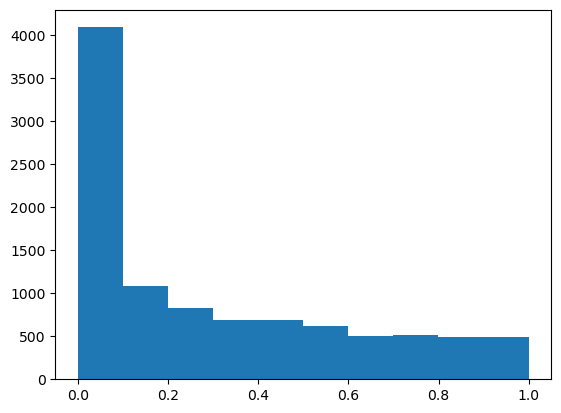

In [4]:
def test2():
  max_iteration =10000
  list_p_value =[]
  alpha = 0.05 #kiểm soát mức độ lỗi
  count=0

  for _ in range(max_iteration):
    p_value = run2()
    list_p_value.append(p_value)
    # print(p_value)
    if p_value <= alpha:
      count +=1
  print('Count: ',count)
  print('FPR: ',count/max_iteration)

  # Plot the distribution of p-values
  list_p_value = np.array(list_p_value)
  list_p_value = list_p_value.flatten()
  plt.hist(list_p_value) #-> uniform distribution
  plt.show()

test2()